# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

626

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Create an empty list to store the responses
city_data = []

# set up lists to hold reponse info
lat = []
lng = []
temp = []
cloud = []
humidity = []
country = []
date = []
wind = []
city_table = []



#URL and Units to use
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "Imperial"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

# Make a request for each of the indices
for x in range(len(cities)):
    print(f"Processing Record {x} for Set {cities[x]}")

    # Get one of the posts
    try:
        post_response = requests.get(query_url + str(cities[x])).json()
        city_table.append(post_response['name'])
        cloud.append(post_response['clouds']['all'])
        humidity.append(post_response['main']['humidity'])
        country.append(post_response['sys']['country'])
        lat.append(post_response['coord']['lat'])
        lng.append(post_response['coord']['lon'])
        temp.append(post_response['main']['temp_max'])
        wind.append(post_response['wind']['speed'])
        date.append(post_response['dt'])
    except KeyError:
        print("City not found. Skipping...")
       
    # Save post's JSON
    city_data.append(post_response)
    




Processing Record 0 for Set severo-kurilsk
Processing Record 1 for Set lompoc
Processing Record 2 for Set laguna
Processing Record 3 for Set kapaa
Processing Record 4 for Set puerto ayora
Processing Record 5 for Set soure
Processing Record 6 for Set atuona
Processing Record 7 for Set ushuaia
Processing Record 8 for Set nishihara
Processing Record 9 for Set faanui
Processing Record 10 for Set hilo
Processing Record 11 for Set ocana
Processing Record 12 for Set bredasdorp
Processing Record 13 for Set cape town
Processing Record 14 for Set kahului
Processing Record 15 for Set avarua
Processing Record 16 for Set pangnirtung
Processing Record 17 for Set cidreira
Processing Record 18 for Set tasiilaq
Processing Record 19 for Set kavaratti
Processing Record 20 for Set taolanaro
City not found. Skipping...
Processing Record 21 for Set nikolskoye
Processing Record 22 for Set nizza monferrato
Processing Record 23 for Set riyadh
Processing Record 24 for Set vaini
Processing Record 25 for Set buss

Processing Record 196 for Set ribeira grande
Processing Record 197 for Set yamasaki
Processing Record 198 for Set chiredzi
Processing Record 199 for Set yima
Processing Record 200 for Set kuche
City not found. Skipping...
Processing Record 201 for Set itapui
Processing Record 202 for Set chuy
Processing Record 203 for Set vaitupu
City not found. Skipping...
Processing Record 204 for Set north ridgeville
Processing Record 205 for Set naryan-mar
Processing Record 206 for Set camocim
Processing Record 207 for Set sentyabrskiy
City not found. Skipping...
Processing Record 208 for Set nome
Processing Record 209 for Set nabire
Processing Record 210 for Set torbay
Processing Record 211 for Set karaul
City not found. Skipping...
Processing Record 212 for Set leningradskiy
Processing Record 213 for Set tortoli
Processing Record 214 for Set rorvik
Processing Record 215 for Set saint-pierre
Processing Record 216 for Set dikson
Processing Record 217 for Set nogent-le-rotrou
Processing Record 218 f

Processing Record 388 for Set samalaeulu
City not found. Skipping...
Processing Record 389 for Set mys shmidta
City not found. Skipping...
Processing Record 390 for Set luhyny
Processing Record 391 for Set esmeraldas
Processing Record 392 for Set lebork
Processing Record 393 for Set acapulco
Processing Record 394 for Set mayo
Processing Record 395 for Set cairns
Processing Record 396 for Set san jose
Processing Record 397 for Set kamariotissa
Processing Record 398 for Set pila
Processing Record 399 for Set zhanaozen
Processing Record 400 for Set narsaq
Processing Record 401 for Set karakendzha
City not found. Skipping...
Processing Record 402 for Set kisangani
Processing Record 403 for Set brae
Processing Record 404 for Set roma
Processing Record 405 for Set vardo
Processing Record 406 for Set anloga
Processing Record 407 for Set vila velha
Processing Record 408 for Set egvekinot
Processing Record 409 for Set baie-saint-paul
Processing Record 410 for Set beringovskiy
Processing Record 

Processing Record 586 for Set sidi ali
Processing Record 587 for Set diamantino
Processing Record 588 for Set yala
Processing Record 589 for Set lysva
Processing Record 590 for Set petropavlovka
Processing Record 591 for Set artyk
City not found. Skipping...
Processing Record 592 for Set afmadu
City not found. Skipping...
Processing Record 593 for Set barcelos
Processing Record 594 for Set okhotsk
Processing Record 595 for Set casas grandes
Processing Record 596 for Set kruisfontein
Processing Record 597 for Set ust-kuyga
Processing Record 598 for Set pacifica
Processing Record 599 for Set grindavik
Processing Record 600 for Set khrebtovaya
Processing Record 601 for Set tarata
Processing Record 602 for Set acari
Processing Record 603 for Set fukue
Processing Record 604 for Set masterton
Processing Record 605 for Set bacuit
City not found. Skipping...
Processing Record 606 for Set ulcinj
Processing Record 607 for Set machhlishahr
Processing Record 608 for Set santa marta
Processing Reco

In [4]:
print(len(city_table))
print(len(cloud))
print(len(country))
print(len(humidity))
print(len(lat))
print(len(lng))
print(len(temp))
print(len(wind))
print(len(date))

564
564
564
564
564
564
564
564
564


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:


# create a data frame from cities, lat, and temp
weather_dict = {
    "City": city_table,
    "Cloudiness" : cloud,
    "Country" : country,
    "Date" : date,
    "Humidity" : humidity,
    "Lat" : lat,
    "Lng" : lng, 
    "Max Temp": temp,
    "Wind Speed" : wind
}
city_data_pd = pd.DataFrame(weather_dict)
city_data_pd.head()

#np.savetxt("city_data_new.csv", city_data_pd, delimiter=",")
city_data_pd.to_csv("City_data_NEW.csv")

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

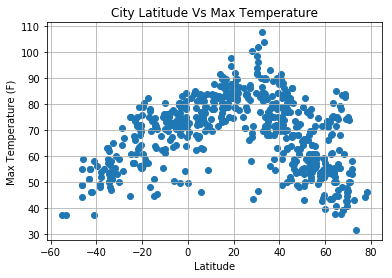

In [7]:
# Build a scatter plot for each data type
plt.scatter(lat, temp, marker="o")

# Incorporate the other graph properties
plt.title("City Latitude Vs Max Temperature")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("LatitudeVsTemp.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

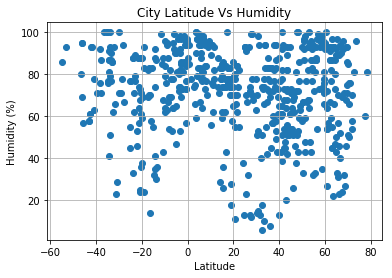

In [8]:
# Build a scatter plot for each data type
plt.scatter(lat, humidity, marker="o")

# Incorporate the other graph properties
plt.title("City Latitude Vs Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("LatitudeVsHumidity.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

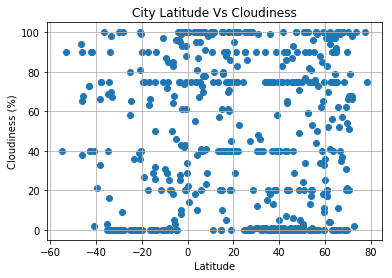

In [9]:
# Build a scatter plot for each data type
plt.scatter(lat, cloud, marker="o")

# Incorporate the other graph properties
plt.title("City Latitude Vs Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("LatitudeVsCloud.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

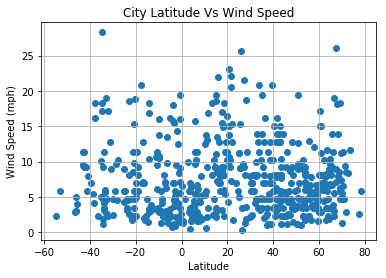

In [10]:
# Build a scatter plot for each data type
plt.scatter(lat, wind, marker="o")

# Incorporate the other graph properties
plt.title("City Latitude Vs Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("LatitudeVsWind.png")

# Show plot
plt.show()